# Image Classicaition

**CS 4375 Intro to ML**

**Dr. Karen Mazidi**

**Prepare by Leo Nguyen - ldn190002**

### Instruction 1

    - Find a image classification data set that interests you. 
    - Divide into train/test
    - Create a graph showing the distribution of the target classes.
    - Describe the data set and what the model should be able to predict.

**Import all require modules an packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import datasets, layers, models, preprocessing

import seaborn as sb

**Creating pandas datasets from seg_train, seg_testfolders**

    - Train dataset :  using image from seg_train folder
    - Test dataset :   using image from seg_test folder
    

Data paths and image specifications

In [2]:
cwd = os.getcwd()

#data path
trainpath = cwd + '/seg_train/'   
testpath = cwd + '/seg_test/'

Checking information on training dataset

In [3]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations_train=pd.concat([foldernames,itemnumbers],axis=1)
print(informations_train)

  Folder_name  Traning Image Numbers
0   buildings                   2191
1      forest                   2271
2     glacier                   2404
3    mountain                   2512
4         sea                   2274
5      street                   2382


Checking information on test dataset

In [4]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(testpath + 'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({' Test Image Numbers':folder_item_numbers})
informations_test=pd.concat([foldernames,itemnumbers],axis=1)
print(informations_test)

  Folder_name   Test Image Numbers
0   buildings                  437
1      forest                  474
2     glacier                  553
3    mountain                  525
4         sea                  510
5      street                  501


**Data prepocessing**

    - Resize all images to new size = 100
    - Converting images to an array as X for predictor and and making a labeling array for it as y for target classes

In [5]:
new_size = 100
IMG_SIZE = (new_size, new_size)

Creating train dataset

In [6]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image_class = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
        orignal_image = cv2.imread(file)
        resized_image = cv2.resize(orignal_image , (new_size,new_size))
        X_train.append(list(resized_image))
        y_train.append(image_class[folder])

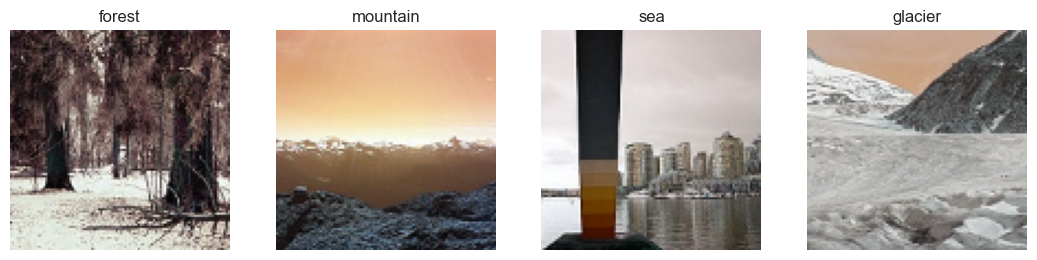

In [7]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),4))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    classes = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
    def get_img_class(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(get_img_class(y_train[i]))

In [8]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image_class = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
        orignal_image = cv2.imread(file)
        resized_image = cv2.resize(orignal_image , (new_size,new_size))
        X_test.append(list(resized_image))
        y_test.append(image_class[folder])

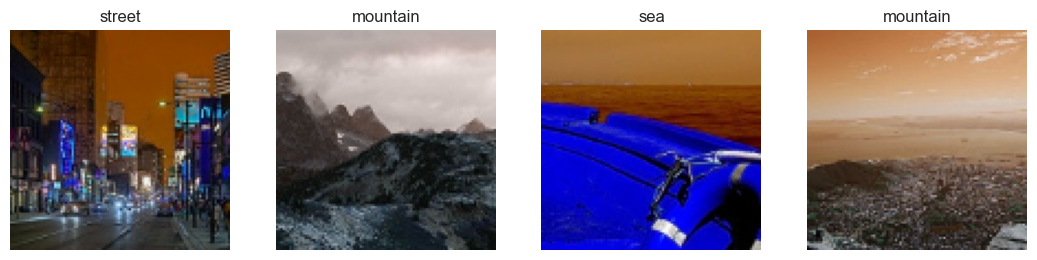

In [9]:
#showing validation images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),4))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    classes = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
    def get_img_class(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(get_img_class(y_test[i]))

Converting all dataset into numpy array

In [10]:
#converting all data to array
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

print("X_train shape  : ",X_train.shape)
print("y_train shape :" ,y_train.shape)

print("X_test shape  :" ,X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape  :  (14034, 100, 100, 3)
y_train shape : (14034,)
X_test shape  : (3000, 100, 100, 3)
y_test shape : (3000,)


**Graph to show the distribution of target classes**

In [11]:
informations_train.head

<bound method NDFrame.head of   Folder_name  Traning Image Numbers
0   buildings                   2191
1      forest                   2271
2     glacier                   2404
3    mountain                   2512
4         sea                   2274
5      street                   2382>

Distribution of train dataset

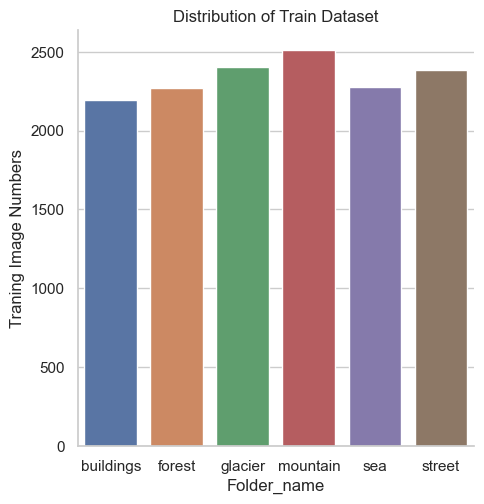

In [33]:
sb.catplot(data=informations_train, 
           x="Folder_name", 
           y='Traning Image Numbers', 
           kind="bar").set(title='Distribution of Train Dataset')

**Describe the data set and what the model should be able to predict.**

- Image Scene Classification of Multiclass. Link reference:

https://www.kaggle.com/code/mostafaeltalawy/image-classification-using-keras/data

- This Data contains around 25k images of size 150x150 distributed under 6 categories.

{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

- The Train, Test and Prediction data is separated in each zip files. 

- There are around 14k images in Train, 3k in Test and 7k in Prediction.

- This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.

** Three models below will be able to using the data from seg_train and seg_test folder to build train and test dataset. Then using the classified images from train dataset to train to recognize the 6 different catergories. Finally  the test dataset will be used to evaluate the accuracy of each models.**


### Intruction 2 - Sequential Model

    - Create a sequential model
    - Evaluate on the test data

**Build a sequential model**

In [13]:
len(X_train)

14034

In [14]:
# fit model
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(100, 100, 3)),
    tf.keras.layers.Dense(128, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(64, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(32, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(6, kernel_initializer='normal', activation='sigmoid')
])
 
# compile
model1.compile(optimizer ='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
# train
model1.fit(X_train, y_train, 
           epochs=10, 
           batch_size=128,
           verbose=1,
           validation_split=0.2)

Epoch 1/10
88/88 [==============================] - 5s 55ms/step - loss: 13.7089 - accuracy: 0.3315 - val_loss: 155.0949 - val_accuracy: 0.0000e+00
Epoch 2/10
88/88 [==============================] - 5s 53ms/step - loss: 2.4611 - accuracy: 0.4237 - val_loss: 106.0948 - val_accuracy: 0.0167
Epoch 3/10
88/88 [==============================] - 5s 52ms/step - loss: 1.9902 - accuracy: 0.4400 - val_loss: 83.5097 - val_accuracy: 0.1144
Epoch 4/10
88/88 [==============================] - 5s 53ms/step - loss: 1.6426 - accuracy: 0.4699 - val_loss: 63.3872 - val_accuracy: 0.0755
Epoch 5/10
88/88 [==============================] - 5s 53ms/step - loss: 1.3242 - accuracy: 0.5130 - val_loss: 63.2288 - val_accuracy: 0.0652
Epoch 6/10
88/88 [==============================] - 5s 52ms/step - loss: 1.2861 - accuracy: 0.5176 - val_loss: 63.8219 - val_accuracy: 0.0135
Epoch 7/10
88/88 [==============================] - 5s 52ms/step - loss: 1.1680 - accuracy: 0.5513 - val_loss: 65.1938 - val_accuracy: 0.0185

In [15]:
# Show model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 128)               3840128   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 6)                 198       
                                                                 
Total params: 3,850,662
Trainable params: 3,850,662
Non-trainable params: 0
_________________________________________________________________


**Evaluation**

In [16]:
test_Loss, test_Acc = model1.evaluate(X_test, y_test)

print('Loss:', test_Loss)
print('Accuracy :', test_Acc)

94/94 [==============================] - 1s 9ms/step - loss: 13.3114 - accuracy: 0.4477
Loss: 13.311408996582031
Accuracy : 0.4476666748523712


### Instruction 3 - Sequential Model with CNN Architecture

    - Try CNN architecture and evaluate on the test data

**Build a CNN model**

In [17]:
# Fit model
model2 = keras.models.Sequential([
        keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(new_size,new_size,3)),
        keras.layers.MaxPool2D(4,4), 
        keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten(),
        keras.layers.Dense(32,activation='relu') ,
        keras.layers.Dense(6,activation='softmax') ,    
        ])

# compile
model2.compile(optimizer ='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
# train
model2.fit(X_train, y_train, 
           epochs=10, 
           batch_size=128,
           verbose=1,
           validation_split=0.2)

Epoch 1/10
88/88 [==============================] - 48s 545ms/step - loss: 4.0801 - accuracy: 0.4688 - val_loss: 14.4925 - val_accuracy: 0.0371
Epoch 2/10
88/88 [==============================] - 48s 544ms/step - loss: 1.0539 - accuracy: 0.6125 - val_loss: 12.5519 - val_accuracy: 0.0367
Epoch 3/10
88/88 [==============================] - 48s 550ms/step - loss: 0.8617 - accuracy: 0.6867 - val_loss: 15.5873 - val_accuracy: 0.0563
Epoch 4/10
88/88 [==============================] - 48s 542ms/step - loss: 0.7452 - accuracy: 0.7307 - val_loss: 16.6962 - val_accuracy: 0.1094
Epoch 5/10
88/88 [==============================] - 50s 565ms/step - loss: 0.6874 - accuracy: 0.7562 - val_loss: 17.9217 - val_accuracy: 0.0606
Epoch 6/10
88/88 [==============================] - 48s 549ms/step - loss: 0.6233 - accuracy: 0.7778 - val_loss: 19.0208 - val_accuracy: 0.0819
Epoch 7/10
88/88 [==============================] - 48s 543ms/step - loss: 0.5919 - accuracy: 0.7861 - val_loss: 18.5197 - val_accuracy:

In [18]:
# Show model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 32)               

**Evaluation of CNN**

In [19]:
test_Loss, test_Acc = model2.evaluate(X_test, y_test)

print('Loss:', test_Loss)
print('Accuracy :', test_Acc)

94/94 [==============================] - 4s 45ms/step - loss: 4.6960 - accuracy: 0.6527
Loss: 4.695951461791992
Accuracy : 0.6526666879653931


### Instruction 4 - Pretrain Model Using MobileNet V2 model developed at Google

In [20]:
BATCH_SIZE = 32
IMG_SIZE = (100, 100)

#data pathseg_train
train_dir = cwd + '/seg_train/seg_train/'   
test_dir = cwd + '/seg_test/seg_test/'

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 14034 files belonging to 6 classes.


In [21]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [22]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 3000 files belonging to 6 classes.


Configure the dataset for performance

In [23]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Rescale pixel values

In [24]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

**Create the base model from MobileNet V2 model developed at Google**

In [25]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

Converts each 100x100x3 image into a 4x4x1280 block of features

In [26]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 4, 4, 1280)


Freeze the convolutional base

In [27]:
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 50, 50, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 50, 50, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 50, 50, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 13, 13, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 13, 13, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 13, 13, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 13, 13, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 7, 7, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 7, 7, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 7, 7, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 7, 7, 96)    384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 7, 7, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 7, 7, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 7, 7, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 4, 4, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 4, 4, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 4, 4, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 4, 4, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

Add a classification head

In [28]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


Apply a tf.keras.layers.Dense layer to convert these features into a single prediction per image

In [29]:
prediction_layer = tf.keras.layers.Dense(6)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 6)


Build a pre-train model by chaining together rescaling, base_model and feature extractor layers using the Keras Functional API. As previously mentioned, use training=False as our model contains a BatchNormalization layer.

In [30]:
# Fit Model
inputs = tf.keras.Input(shape=(100, 100, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model4 = tf.keras.Model(inputs, outputs)

# compile
base_learning_rate = 0.0001
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# train
model4.fit(train_dataset, 
           epochs=10, 
           batch_size=128,
           verbose=1)


Epoch 1/10
439/439 [==============================] - 148s 329ms/step - loss: 1.1292 - accuracy: 0.5982
Epoch 2/10
439/439 [==============================] - 119s 270ms/step - loss: 0.5608 - accuracy: 0.7973
Epoch 3/10
439/439 [==============================] - 135s 308ms/step - loss: 0.4630 - accuracy: 0.8340
Epoch 4/10
439/439 [==============================] - 129s 293ms/step - loss: 0.4177 - accuracy: 0.8472
Epoch 5/10
439/439 [==============================] - 132s 301ms/step - loss: 0.3995 - accuracy: 0.8554
Epoch 6/10
439/439 [==============================] - 127s 289ms/step - loss: 0.3697 - accuracy: 0.8643
Epoch 7/10
439/439 [==============================] - 120s 274ms/step - loss: 0.3575 - accuracy: 0.8698
Epoch 8/10
439/439 [==============================] - 114s 259ms/step - loss: 0.3382 - accuracy: 0.8767
Epoch 9/10
439/439 [==============================] - 114s 260ms/step - loss: 0.3296 - accuracy: 0.8770
Epoch 10/10
439/439 [==============================] - 114s 260m

In [31]:
# Show model summary
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 100, 100, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 100, 100, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                      

**Evaluation of using MobileNet V2 model developed at Google**

In [32]:
test_Loss, test_Acc = model4.evaluate(test_dataset)

print('Loss:', test_Loss)
print('Accuracy :', test_Acc)

94/94 [==============================] - 33s 330ms/step - loss: 0.3161 - accuracy: 0.8800
Loss: 0.3160930275917053
Accuracy : 0.8799999952316284


### Instruction 4 - Analysis Performance of Various Approaches

- Among the 3 different approaches: Dense Sequential, CNN and Pre-Train using MobileNet. The 1st approach-Dense Sequential have the least accuracy number (44%). That is a low result even though we already use 3 hidden layer with 128, 64, 32 nodes for each layers. It is becauase we have to convert the image pixel into a into single dim-matrix which make many data point look similar then perform performs a matrix-vector multiplication can make the problem become worse. 

- The 2nd approach-CNN also have better result (65%) with same setting and epoch number. The accuracy increase as expected because CNN usualy work better on images or video processing. I belived if we add more layer and increase the epoch, can achieve a better result.

- The last approach- Pre-Train using MobileNet has the highest accuracy is 87%. It is because it was build on a pre-train base model - MobileNet. This MobileNet was developed at Google which mean they can with more layers and data to learn on the image data much better. Of course, this will require a powerful main frame computer to perform the task.
